In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Airline Passengers Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Check the size of the dataset before scaling
print("Number of rows in the raw dataset:", len(data))

# Take only the "Passengers" column for simplicity
stock_data = data[['Passengers']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

# Check the size of the dataset after scaling
print("Number of rows in the scaled dataset:", len(scaled_data))

# 21BCE2067 Kshitiz Bhargava

Number of rows in the raw dataset: 144
Number of rows in the scaled dataset: 144


Shape of X: (132, 12)
Shape of y: (132,)
Epoch 1/50


/Users/manvendrasingh/Library/CloudStorage/OneDrive-vit.ac.in/7th Sem/Deep Learning/Lab/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1157 - val_loss: 0.2275
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0360 - val_loss: 0.0549
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - val_loss: 0.0241
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216 - val_loss: 0.0227
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0501
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 0.0601
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - val_loss: 0.0404
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0237
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - val_loss: 0.0216
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0220
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - val_loss: 0.0240
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.0224
Epoch 13/50
4/4 ━━━━━━━

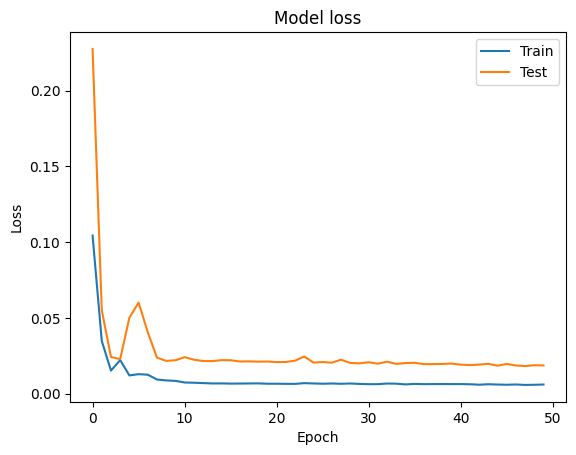

MAPE (Mean Absolute Percentage Error): 15.88%


In [2]:
# Define the create_sequences function
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    
    if len(data) <= sequence_length:
        return np.array(sequences), np.array(labels)

    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i, 0])
        labels.append(data[i, 0])

    return np.array(sequences), np.array(labels)

# Adjust the sequence length based on the dataset size
sequence_length = 12  # Use last 12 months for prediction
X, y = create_sequences(scaled_data, sequence_length)

# Print shape of X and y for debugging
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

if X.size > 0 and y.size > 0:
    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Build the LSTM model
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Add early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Now we can evaluate the model
    train_loss = model.evaluate(X_train, y_train)
    test_loss = model.evaluate(X_test, y_test)

    print(f'Training Loss: {train_loss}')
    print(f'Test Loss: {test_loss}')

    # Generate predictions
    y_pred = model.predict(X_test)

    # Inverse scaling for both predicted and actual values
    y_test_inverse = scaler.inverse_transform([y_test])
    y_pred_inverse = scaler.inverse_transform(y_pred)

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test_inverse - y_pred_inverse) / y_test_inverse)) * 100
    print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')
else:
    print("Not enough data to create sequences. Adjust sequence_length or add more data.")

# 21BCE2067 Kshitiz Bhargava